In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
image = cv2.imread('StarMap.png',0)
image2 = image.copy()
tpl = cv2.imread('Small_area_rotated.png',0)
tpl2 = cv2.imread('Small_area.png',0)

In [4]:
def find_image(img, template):

  w, h = template.shape[::-1]
  method = eval('cv2.TM_SQDIFF')
  res = cv2.matchTemplate(img,template,method)
  if res.any():
    #our values
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    #left side position
    top_left = min_loc
    #right side position
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
     #illustration
    plt.figure(figsize=(20,16))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle('Find Image') 
    plt.show()
    return f'coordinates : {min_loc}, {max_loc}'
  return 'There is no matching image'

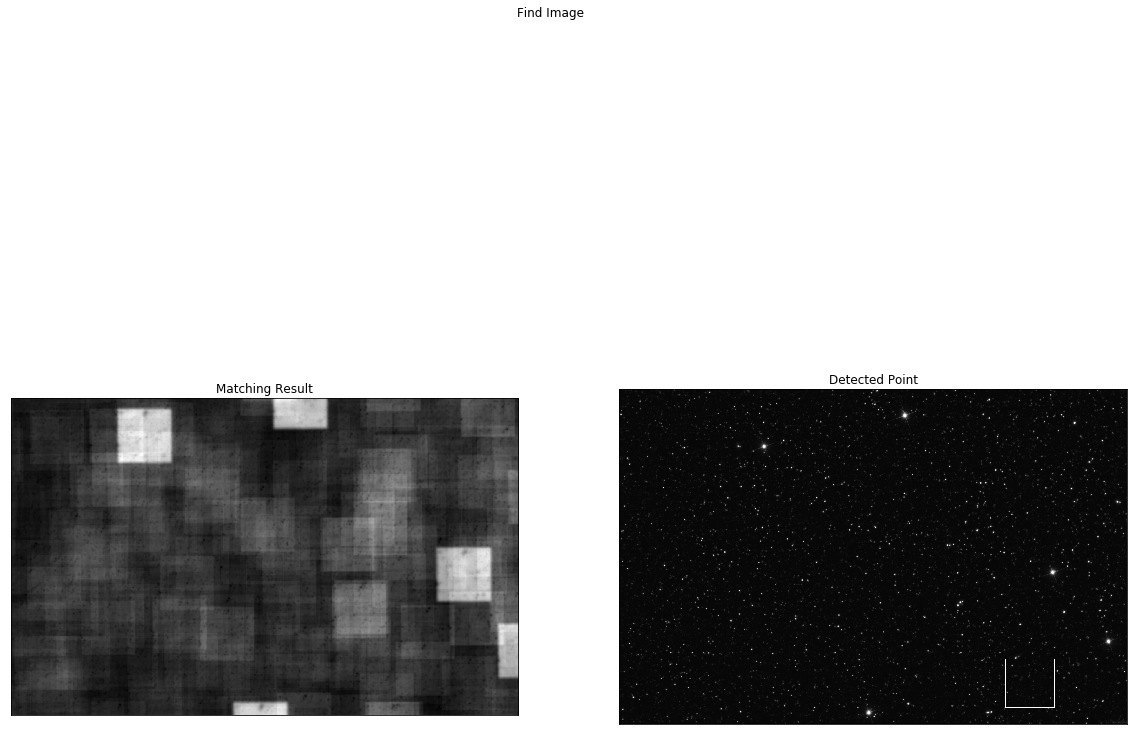

'coordinates : (1218, 852), (316, 174)'

In [5]:
find_image(image,tpl)

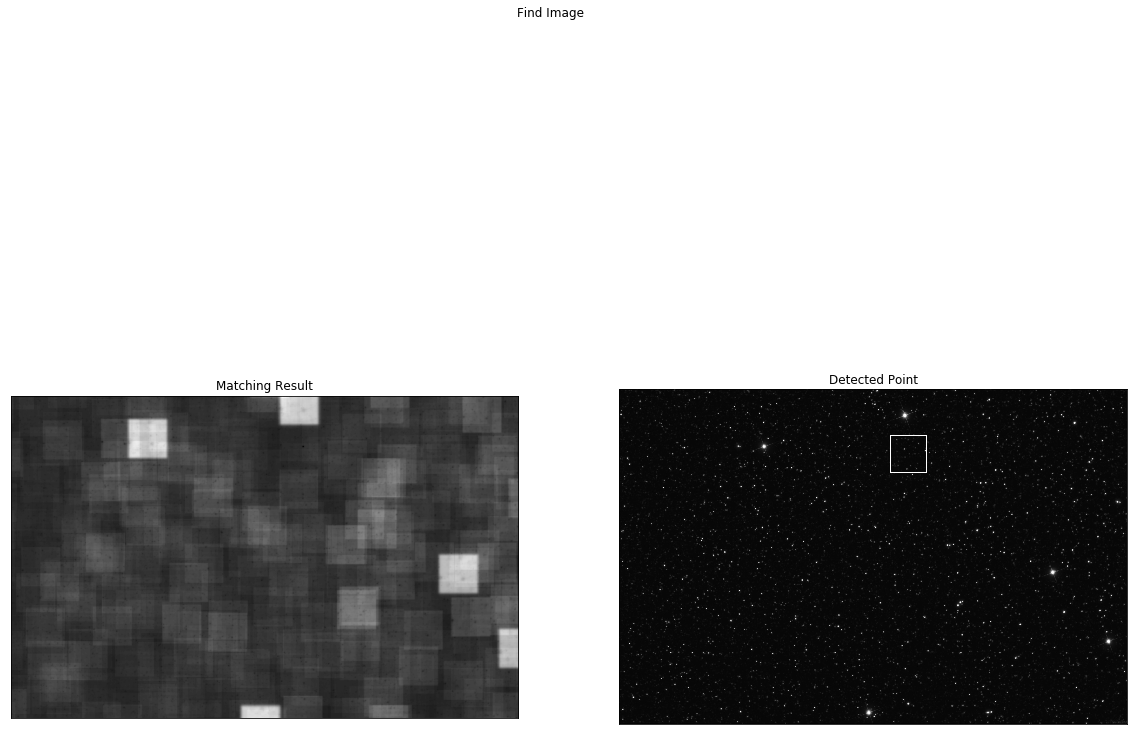

'coordinates : (855, 150), (795, 4)'

In [6]:
find_image(image2,tpl2)